# Проведения EDA на примере данных о пассажирах Титаника

Перед построением моделей машинного обучения мы проведём разведочный анализ данных (EDA), который включает:

1. Первичный осмотр данных.
2. Визуализация распределений.
3. Анализ взаимосвязей.
4. Инжиниринг признаков.
5. Корреляционный анализ.
6. Формулировка гипотез.

Этапы 3, 4 и 6 включены в раздел "визуализация распределений", корреляционный анализ вынесен в раздел "матрица корреляции признаков".

В конце работы мы сделаем вывод о данных, что мы исследовали. Выделим ключевые признаки и зависимости между ними и выживамостью на Титанике, а также найдём наиболее уязвимую группу людей.

## Загрузка библиотек

Установим следующие библиотеки:

**pandas** - библиотека для анализа и обработки табличных данных.

**numpy** - модуль для научных вычислений, работы с многомерными массивами и линейной алгеброй.

**matplotlib.patches** - модуль для создания графических примитивов (фигур) в Matplotlib.

**matplotlib.pyplot** - основной интерфейс для построения графиков и диаграмм.

**seaborn** - библиотека для визуализации статистических данных на основе Matplotlib.

**scikit-learn** - библиотека машинного обучения, предоставляющая инструменты для классификации, регрессии и анализа данных.

А также импортируем в проект вспомогательные модули и методы:
Из **sklearn**:

**model_selection.cross_val_score** - функция для оценки модели с помощью кросс-валидации.

**linear_model.LogisticRegression** - алгоритм логистической регрессии для задач классификации.

**tree.DecisionTreeClassifier** - алгоритм классификации на основе дерева решений.

**ensemble.GradientBoostingClassifier** - алгоритм градиентного бустинга для классификации.

**ensemble.RandomForestClassifier** - алгоритм классификации методом "Случайный лес".

**neural_network.MLPClassifier** - алгоритм многослойного перцептрона для классификации.

**preprocessing.StandardScaler** - инструмент для стандартизации признаков (приведение к нулевому среднему и единичной дисперсии).

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

## Анализ первичных данных

Загрузим в переменную *df* данные о пассажирах Титаника из файла "Titanic.csv":

In [49]:
df = pd.read_csv("Titanic.csv")

При помощи функции ".info()" выведем информацию о дата-фрейме:

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Из выведенной ифнормации можно узнать следующее о структуре дата-фрейма:

- RangeIndex, - говорит о том, что у нас есть 891 строк, с номерами от 0 до 890.

- Column, - названия столбцов нашего дата-фрейма, всего столбцов 12.

- Non-null Count, - сообщает о заполненных ячейках таблицы.

- Dtype, - это тип данных в ячейке.


Далее при помощи метода ".describe()" выведем описательную статистику дата-фрейма:

In [51]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


По каждой колонке имеем следующие характеристики:

- count, - количество заполненных значений.
- mean, - среднее значение.
- std, - стандартное отклонение.
- min, - минимальное значение.
- 25%, -первый квартиль (нижние 25% значений).
- 50%, - медиана (середина).
- 75%, - третий квартиль (верхние 25% значений).
- max, - максимальное значение.

Также стоит объяснить колонки нашего дата-фрейма:

- PassengerId - уникальный идентификатор пассажира.

- Survived - выжил ли пассажир (0 - нет, 1 - да).

- Pclass - класс билета:

  - 1 = первый класс (высший).

  - 2 = второй класс (средний).

  - 3 = кретий класс (низший).

- Name - полное имя пассажира.

- Sex - пол:

  - male = мужчина.

  - female = женщина.

- Age - возраст в годах.

- SibSp - количество родственников на борту.

- Parch - количество родителей/детей на борту.

- Ticket - номер билета (может содержать буквы и цифры).

- Fare - стоимость билета в фунтах стерлингов.

- Cabin - номер каюты.

- Embarked - порт посадки:

  - C = Шербур (Cherbourg).

  - Q = Квинстаун (Queenstown).

  - S = Саутгемптон (Southampton).

### Вывод

Как оказалось, не все колонки имеют заполненные значения:

- Age (возраст), 714 из 891 заполнено. Пропущено 277 значений.

- Cabin (каюта), 204 из 891 заполнено. Пропущено 687 значений.

- Embarked (порт посадки), 889 из 891. Пропущено 2 значения.

# Визуализация распределений

## Диаграмма пропущенных значений

Изобразим пропущенные значения при помощи диаграммы "тепловая карта". По оси ординат отобразим номера строк, в которой имеются пропуски, а по оси абцисс названия столбцов.

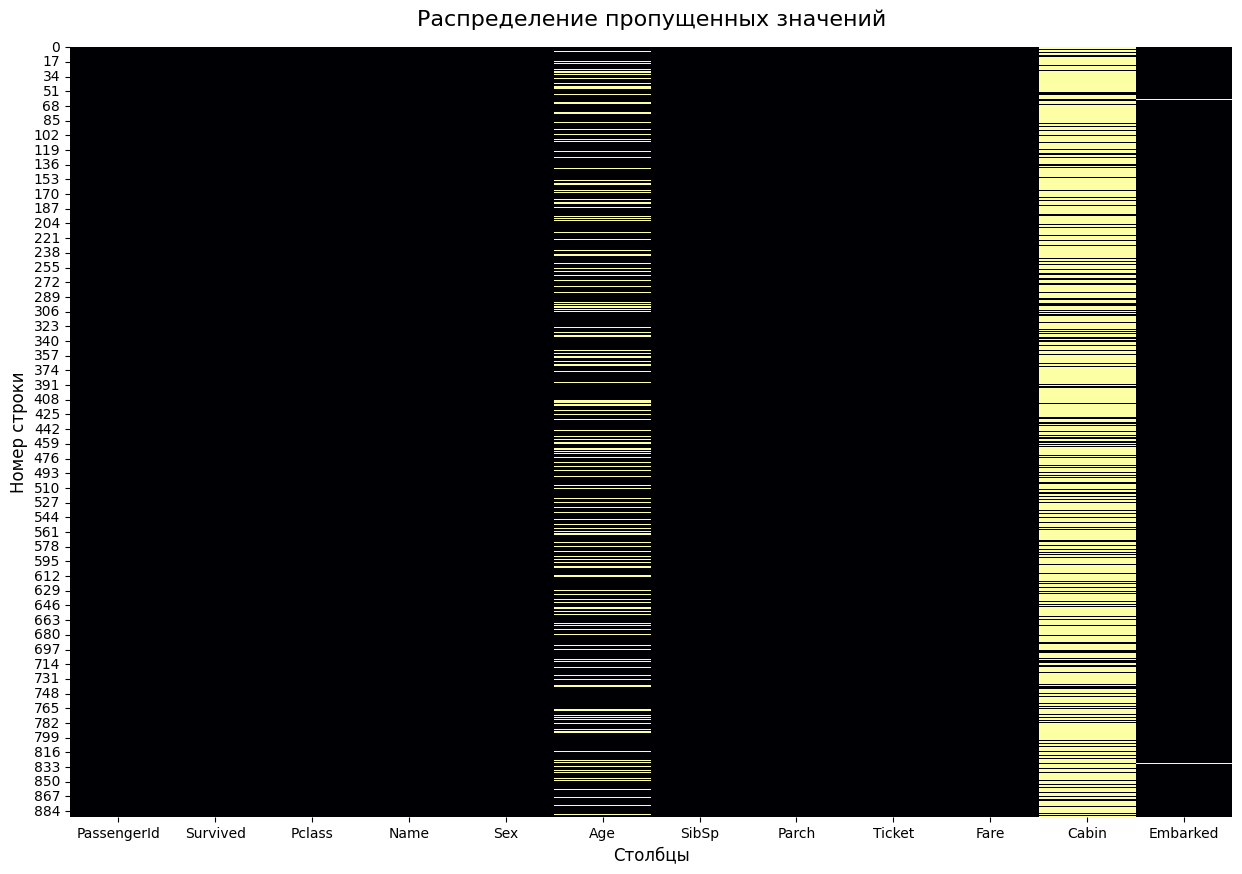

In [52]:
# Задаём размер диаграммы
plt.figure(figsize=(15, 10))

# Создаём тепловую карту
sns.heatmap(
    df.isnull(),
    cbar=False,
    cmap='inferno',
)

# Изменяем названия осей и диаграммы
plt.title("Распределение пропущенных значений", fontsize=16, pad=15)
plt.xlabel("Столбцы", fontsize=12)
plt.ylabel("Номер строки", fontsize=12)
plt.show()

## Диаграмма выживаемости

Для визуализации соотношения выживших и погибших пассажиров Титаника построим столбчатую диаграмму распределения по признаку 'Survived':

/tmp/ipython-input-53-3615816430.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Survived', palette=['#ff6b6b','#48dbfb'])


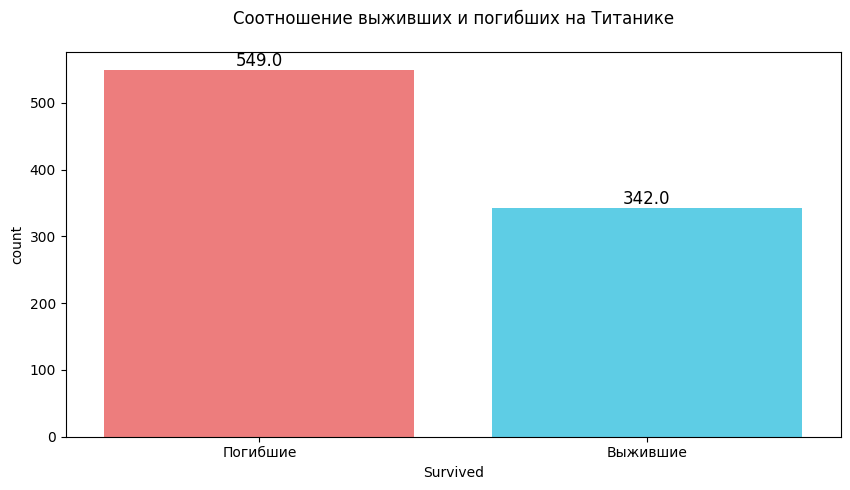

In [53]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=df, x='Survived', palette=['#ff6b6b','#48dbfb'])

# Добавляем точные числа на столбцы
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=12)

# Заменяем цифровые метки на текстовые
plt.xticks([0,1], ['Погибшие', 'Выжившие'])
plt.title("Соотношение выживших и погибших на Титанике", pad=20)
plt.show()

### Вывод

> Больше половины пассажиров не выжило (549 из 891) – количество погибших существенно превышает число выживших. Это указывает на низкую общую выживаемость во время катастрофы.

## Диаграмма выживаемости от пола

Построим график распределения признака Зависимость выживаемости от пола. Гистограмма разделена на 4 столбца:

Левые столбцы (Мужчины):

- Синий (0) — количество невыживших мужчин

- Оранжевый (1) — количество выживших мужчин

Правые столбцы (Женщины):

- Синий (0) — количество невыживших женщин

- Оранжевый (1) — количество выживших женщин

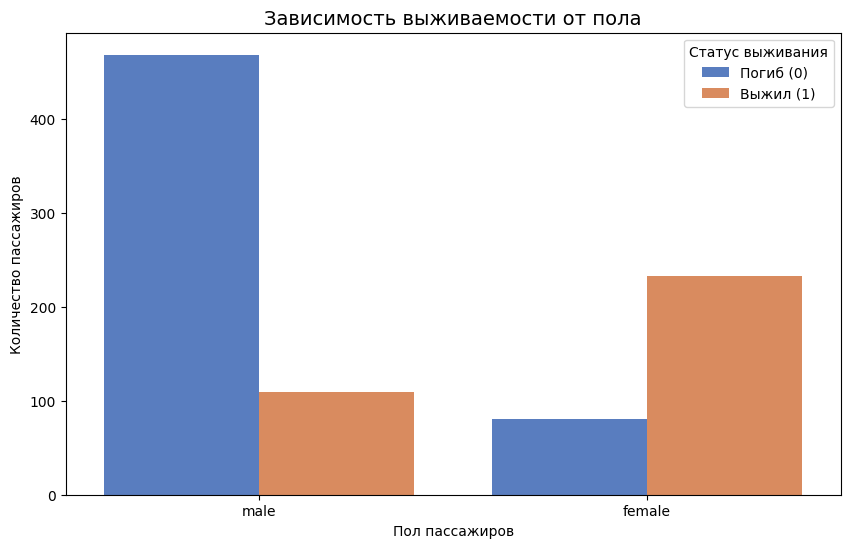

In [54]:
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    x='Sex',
    hue='Survived',
    palette='muted'
)

plt.title("Зависимость выживаемости от пола", fontsize=14)
plt.xlabel('Пол пассажиров')
plt.ylabel('Количество пассажиров')
plt.legend(
    title='Статус выживания',
    labels=['Погиб (0)', 'Выжил (1)'],
    loc='upper right',
    title_fontsize=10
)
plt.show()

### Вывод

График показал, что среди женщин:

- Подавляющее большинство выжило (высокий оранжевый столбец).

- Малая доля погибших (низкий синий столбец).

Тогда как среди мужчин:

- Большинство погибло (высокий синий столбец).

- Незначительное число выживших (низкий оранжевый столбец).

> Женщины имели крайне высокий шанс на спасение (>70%), тогда как мужчины — очень низкий (<20%).

Это подтверждает исторический принцип эвакуации "сначала женщины и дети", применявшийся на Титанике.

## Диаграмма выживаемости от класса

Построим график распределения признака Класс и выживаемость. Гистограмма разделена на 3 группы столбцов (по классам 1, 2, 3), где внутри каждой группы:

- Синий (0) — количество невыживших в классе.

- Оранжевый (1) — количество выживших в классе.

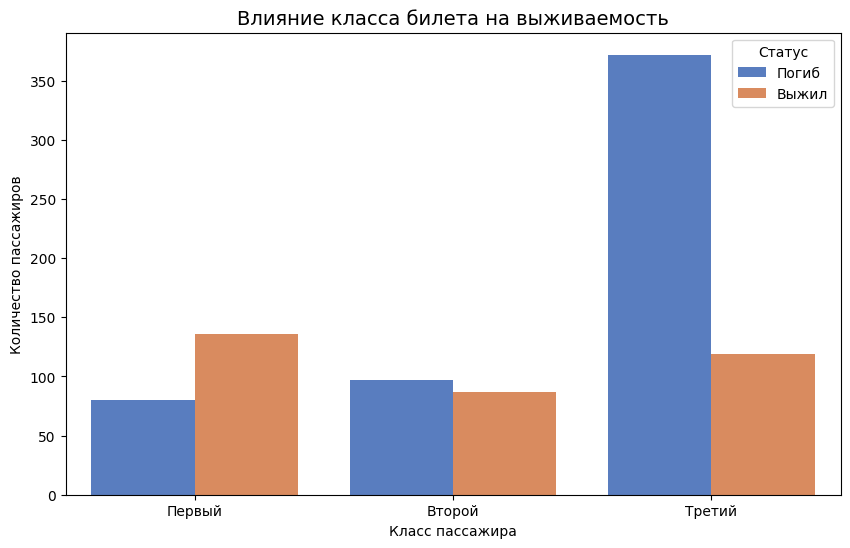

In [55]:
plt.figure(figsize=(10, 6))

sns.countplot(
    data=df,
    x='Pclass',
    hue='Survived',
    palette='muted'  # Синий = 0 (погибшие), оранжевый = 1 (выжившие)
)
plt.title("Влияние класса билета на выживаемость", fontsize=14)
plt.xlabel('Класс пассажира')
plt.ylabel('Количество пассажиров')

plt.legend(
    title='Статус',
    labels=['Погиб', 'Выжил'],
    loc='upper right',
    title_fontsize=10
)
plt.xticks([0, 1, 2], ['Первый', 'Второй', 'Третий'])
plt.show()

### Вывод

Из анализа графика можно сдлеать следующие выводы:

Первый класс:

- Большинство пассажиров выжило (оранжевый столбец выше синего)

Второй класс:

- Примерно равное соотношение выживших и погибших

Третий класс:

- Подавляющее большинство погибло (высокий синий столбец)

> Существует прямая зависимость между классом билета и шансом на выживание:
- Высший класс (1): Наибольшие шансы (>60% выживших)
- Средний класс (2): Средние шансы (~50% выживших)
- Низший класс (3): Наименьшие шансы (<25% выживших)

Это подтверждает, что социально-экономический статус (расположение кают, доступ к шлюпкам) играл ключевую роль в спасении.

## Диаграмма выживаемости от возраста

Построим график распределения признака Возраст и выживаемость, отображающий:

- Распределение возрастов выживших (оранжевый) и погибших (зелёный) пассажиров.

- Линии плотности распределения (KDE).

- Данные только для пассажиров с известным возрастом (отфильтрованы пропуски).

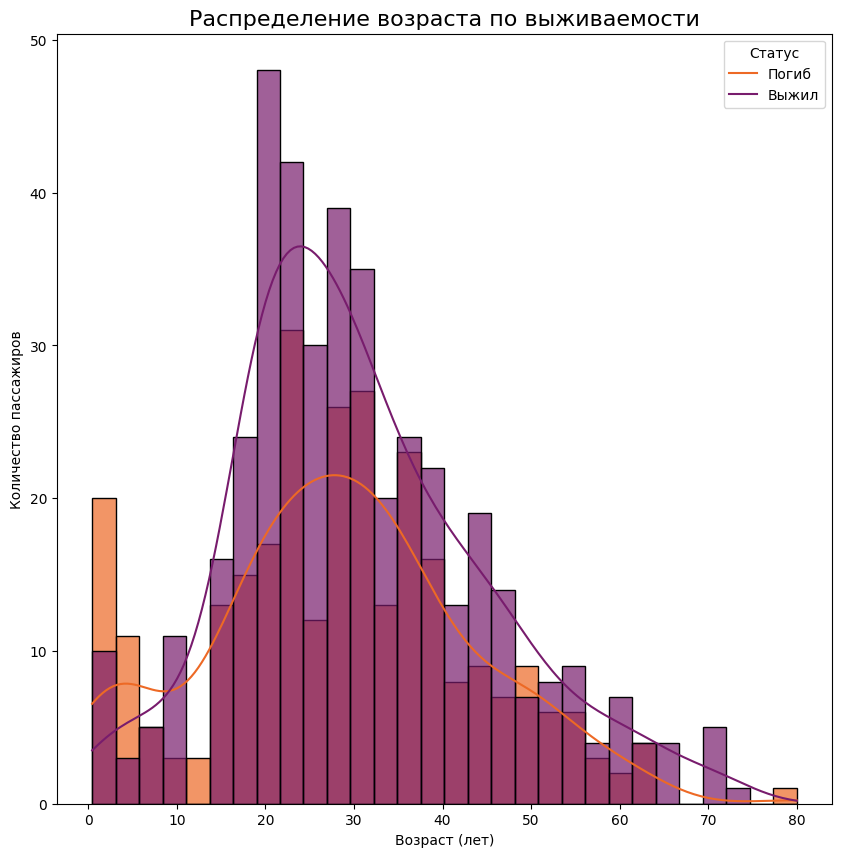

In [56]:
plt.figure(figsize=(10, 10))

# Фильтруем данные (исключаем пропуски возраста) и строим гистограмму
sns.histplot(
    data=df[df['Age'].notna()],
    x='Age',
    hue='Survived',
    bins=30,
    kde=True,
    palette='inferno',  # Зелёный = 0 (погибшие), оранжевый = 1 (выжившие)
    alpha=0.7  # Полупрозрачность
)

plt.title("Распределение возраста по выживаемости", fontsize=16)
plt.xlabel("Возраст (лет)")
plt.ylabel("Количество пассажиров")
plt.legend(
    title='Статус',
    labels=['Погиб', 'Выжил'],
    loc='upper right'
)

plt.show()

### Вывод



Из анализа графика делаем следующие выводы:

Дети (<10 лет):

- Ярко выраженный пик выживаемости (высокий оранжевый столбец)

- Подтверждает принцип "спасать детей в первую очередь"

Молодые взрослые (20-40 лет):

- Основная масса пассажиров (высокие столбцы)

- Но преобладание погибших (зелёные столбцы выше оранжевых)

Пожилые (>60 лет):

- Низкая выживаемость (доминирование зелёного)

Плотность распределения (KDE-линии):

- У выживших два пика: дети (0-10) и молодые взрослые (20-30)

- У погибших один выраженный пик (20-30 лет)

> Возраст значительно влиял на шансы выжить.
Дети имели приоритет — самый высокий процент спасения
Молодые взрослые (20-40) составляли большинство, но выжило менее половины
Пожилые люди имели наименьшие шансы на спасение

## Диаграмма выживаемости от статуса пассажира

Построим график распределения признака "статус пассажира и выживаемость". Анализируем долю выживших для различных обращений или титулов (Title), извлечённых из имён пассажиров. Различные обращения, такие как Mr, Mrs могут указывать на принадлежность к определённому полу и социальному статусу, что может повлиять на приоритет спасения.

/tmp/ipython-input-57-1408504775.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


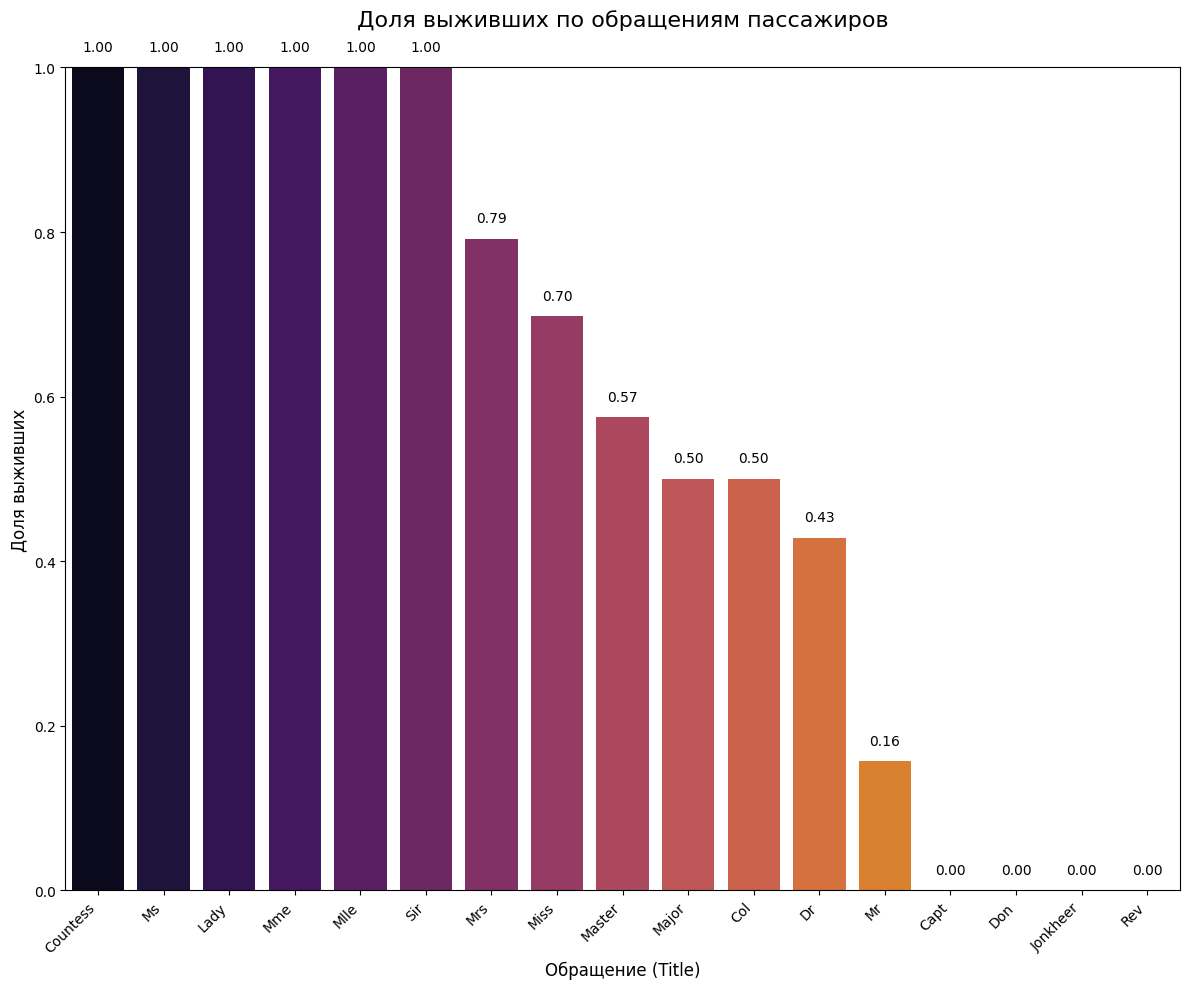

In [57]:
# Извлекаем обращения из имён
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Рассчитываем долю выживших по обращениям
title_survival = df.groupby('Title')['Survived'].mean().sort_values(ascending=False).reset_index()

# Построение столбчатой диаграммы
plt.figure(figsize=(12, 10))
sns.barplot(
    data=title_survival,
    x='Title',
    y='Survived',
    palette='inferno'  # Градиентная цветовая схема
)
plt.title("Доля выживших по обращениям пассажиров", fontsize=16, pad=30)
plt.xlabel("Обращение (Title)", fontsize=12)
plt.ylabel("Доля выживших", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Поворот подписей для читаемости
plt.ylim(0, 1)  # Шкала от 0% до 100%

# Добавляем значения на столбцы
for index, row in enumerate(title_survival['Survived']):
    plt.text(index, row + 0.02, f'{row:.2f}',
             ha='center', fontsize=10)

plt.tight_layout()  # Автоматическая настройка отступов
plt.show()

### Вывод

Анализ показывает резкие различия в выживаемости по обращениям:

Женские обращения (высокая выживаемость):

- Mrs (замужние женщины): около 80%.

- Miss (незамужние женщины): около 70%.

Детские обращения:

- Master (мальчики до 15 лет): около 60%.

Мужские обращения (низкая выживаемость):

- Mr (взрослые мужчины): около 16%.

>Обращение является хорошим прогностическим признаком, так как:
- Прямо коррелирует с полом.
- Отражает возраст.
- Косвенно указывает на социальный статус.
Принцип "женщины и дети вперёд" чётко проявился в данных:
- Максимальный приоритет: Замужние женщины (Mrs).
- Минимальный приоритет: Взрослые мужчины (Mr).

## Диаграмма выживаемости от количества родственников

Построим график распределения признака Размер семьи и выживаемость. На гистограмме:

- По оси X: размер семьи (0 = один, 1-4 = малая/средняя семья, 5+ = большая семья).

- Цвета столбцов: синий = погибшие, оранжевый = выжившие.

- Для каждого размера семьи показано абсолютное количество пассажиров.

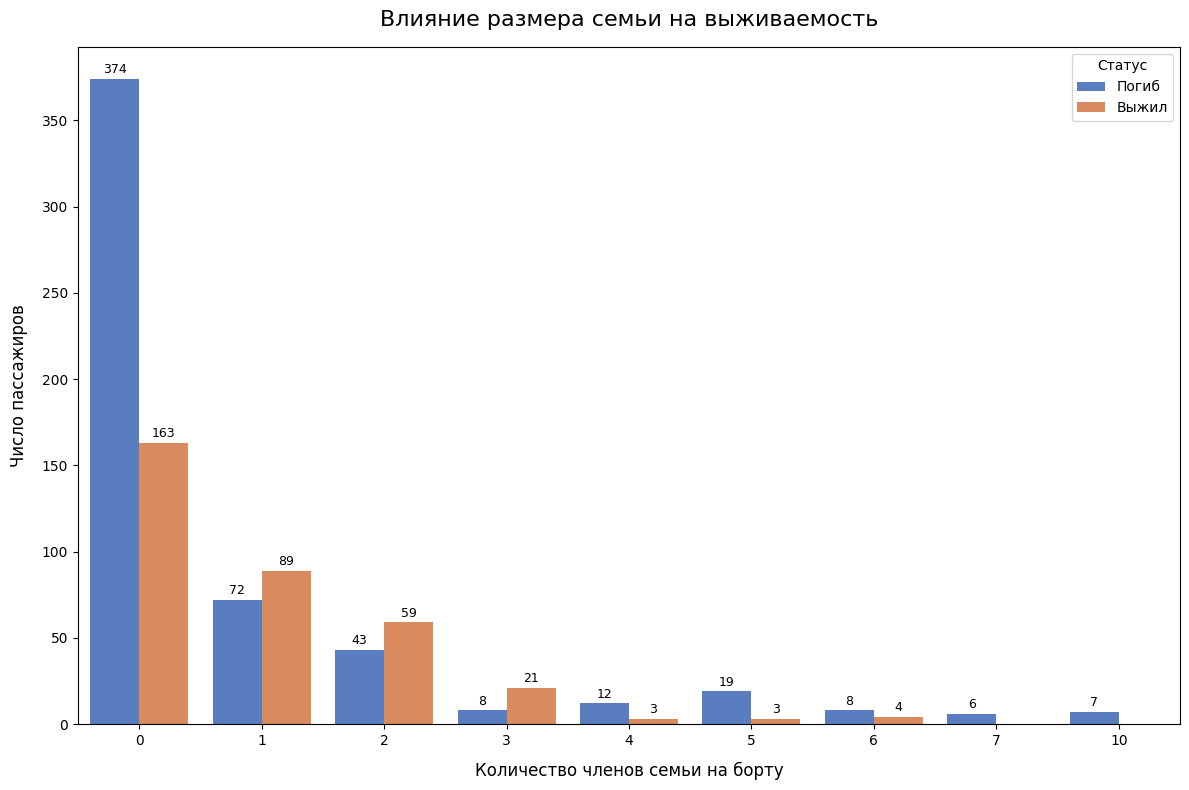

In [58]:
plt.figure(figsize=(12, 8))

# Создаём признак размера семьи
df['FamilySize'] = df['SibSp'] + df['Parch']

# Строим диаграмму
sns.countplot(
    data=df,
    x='FamilySize',
    hue='Survived',
    palette='muted',
    order=sorted(df['FamilySize'].unique())  # Фиксируем порядок
)

# Настройка оформления
plt.title("Влияние размера семьи на выживаемость", fontsize=16, pad=15)
plt.xlabel("Количество членов семьи на борту", fontsize=12, labelpad=10)
plt.ylabel("Число пассажиров", fontsize=12, labelpad=10)
plt.legend(
    title='Статус',
    labels=['Погиб', 'Выжил'],
    loc='upper right',
    frameon=True
)

# Добавляем подписи значений
for container in plt.gca().containers:
    plt.gca().bar_label(container, fontsize=9, padding=2,
                        label_type='edge', fmt='%d')

plt.tight_layout()
plt.show()

### Вывод

Анализ распределения показывает следующее:

Люди-одиночки (FamilySize=0):

- Наибольшее абсолютное число пассажиров.

- Низкая выживаемость (преобладание синих столбцов).

Малые семьи (1-4 члена):

- 1-2 члена: высокий процент выживших.

- 3-4 члена: сбалансированное соотношение.

Крупные семьи (5+ членов):

- Резкое падение выживаемости.

- Особенно критично при более чем 5 членах семьи.

> Наличие семьи влияло на выживаемость нелинейно:
- Положительный эффект: Семьи из 1-4 человек увеличивали шансы.
- Негативный эффект: Крупные семьи (5+ человек) снижали шансы.

>Основные причины могут быть следующими:
- Помощь при эвакуации в малых семьях.
- Сложность организации спасения для больших групп.
- Приоритет женщин и детей в малых семьях.

>Особый случай: одиночки
- Самый высокий риск из-за отсутствия поддержки.

## Матрица корреляции признаков

Построим матрицу корреляций для числовых признаков. Тепловая карта визуализирует силу и направление связей между переменными:

- Красные оттенки: Отрицательная корреляция (чем темнее, тем сильнее связь)

- Синие оттенки: Положительная корреляция (чем темнее, тем сильнее связь)

- Числа в ячейках: Коэффициент корреляции Пирсона. Значение коэффициента +1 означает наличие
полной положительной линейной связи, а значение -1 – наличие полной отрицательной линейной связи.

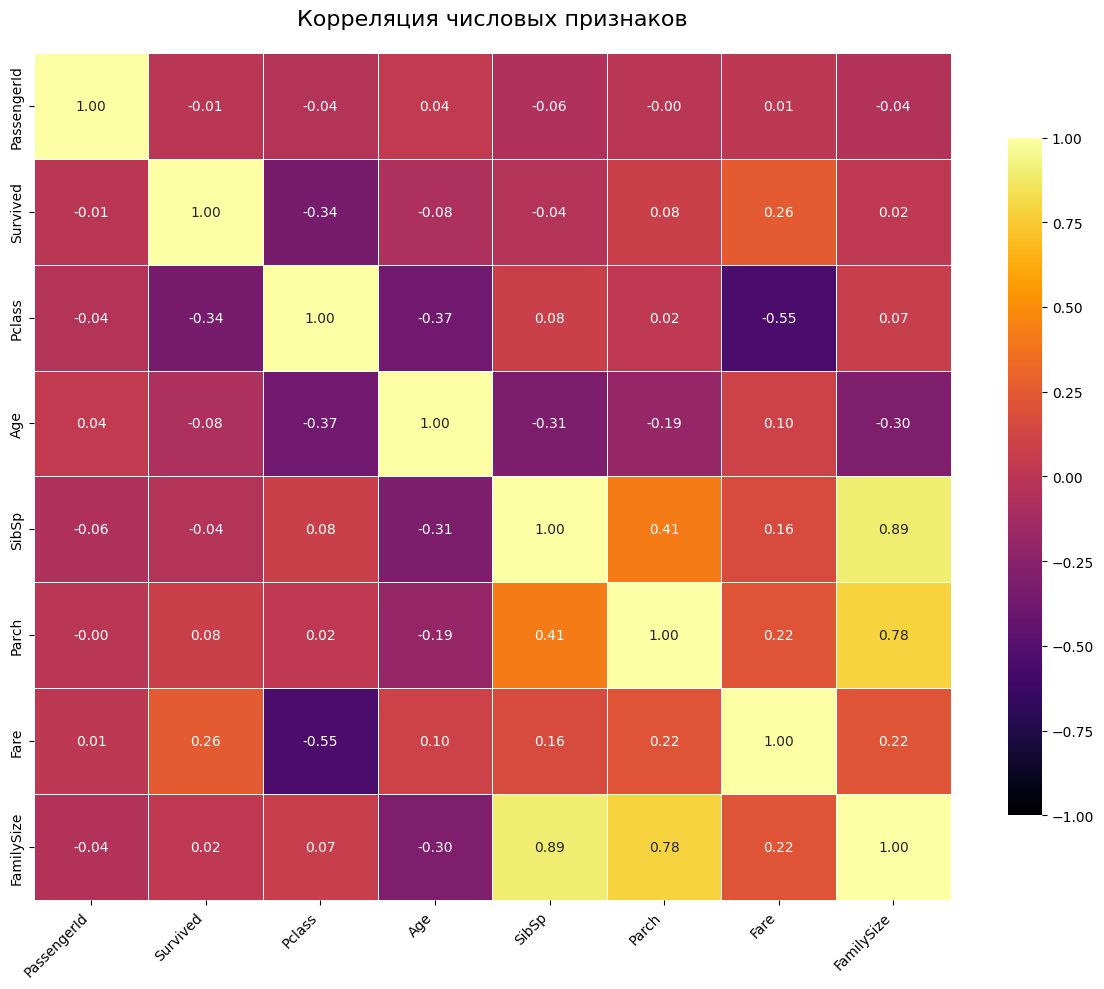

In [59]:
plt.figure(figsize=(12, 10))

# Создаём матрицу корреляций
corr_matrix = df.corr(numeric_only=True)

# Маска для скрытия верхнего треугольника (опционально)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Строим тепловую карту
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='inferno',
    fmt=".2f",  # Формат чисел: 2 знака после запятой
    vmin=-1, vmax=1,  # Фиксируем диапазон для цветовой шкалы
    linewidths=0.5,
    mask=None,  # Убираем маску, чтобы видеть все значения
    cbar_kws={'shrink': 0.8}  # Уменьшаем цветовую шкалу
)

# Настройка заголовка
plt.title("Корреляция числовых признаков", fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')  # Поворот подписей оси X
plt.tight_layout()
plt.show()

### Вывод:
Значимые корреляции с Survived:
- Положительные:

  - Fare (0.26): Чем дороже билет, тем выше шанс выжить.

- Отрицательные:

  - Pclass (-0.34): Пассажиры 1-го класса выживали чаще.

  - Age (-0.08): Слабая связь (пожилые реже выживали).

Связи между признаками:
- Сильные:

  - Pclass и Fare (-0.55): у 1 класса дорогие билеты.

  - SibSp и FamilySize (0.90): родственники также входят в семью.

  - Parch и FamilySize (0.78): так как дети и родители тоже являются членами семьи.

- Умеренные:

  - Pclass и Age (-0.37): В 1-м классе больше взрослых.

  - SibSp и Parch (0.41): Семьи часто включали и детей, и супругов.

- Бесполезные признаки:
  - PassengerId: Нулевая корреляция со всеми признаками, так как эта характеристика в основном нужна для проведения статистических исследований и в реальной жизни ни на что не влияет.

  - Age: Слабая связь с выживаемостью (-0.08).

# Общие выводы по EDA
Ключевые закономерности:

- Женщины выживали в 4 раза чаще мужчин.

- 1-й класс имел преимущество в спасении, по сравнению со 2 и 3 классами.

- Небольшие семьи (1-4 человека) выживали чаще одиночек и больших семей.

- Дорогие билеты коррелируют с выживаемостью (косвенно через класс), повышая шанс на выживаемость.

Перспективные признаки для ML:

`Sex`, `Pclass`, `Fare`, `FamilySize`, `Title` (который извлекается из имени)

Уязвимые группы:

- Мужчины 3-го класса, путешествующие в одиночку, имели наихудшие шансы (выжило <15%).